In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r'C:\Users\HP\Downloads\iris (1).xls')

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.shape

(150, 5)

# Preprocessing

In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
#filling missing values

In [7]:
for num in ['SL','SW','PL']:
    data[num]= data[num].fillna(data[num].median())

In [8]:
data.isna

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data.nunique()

SL                35
SW                23
PL                44
PW                22
Classification     3
dtype: int64

In [11]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [12]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:>

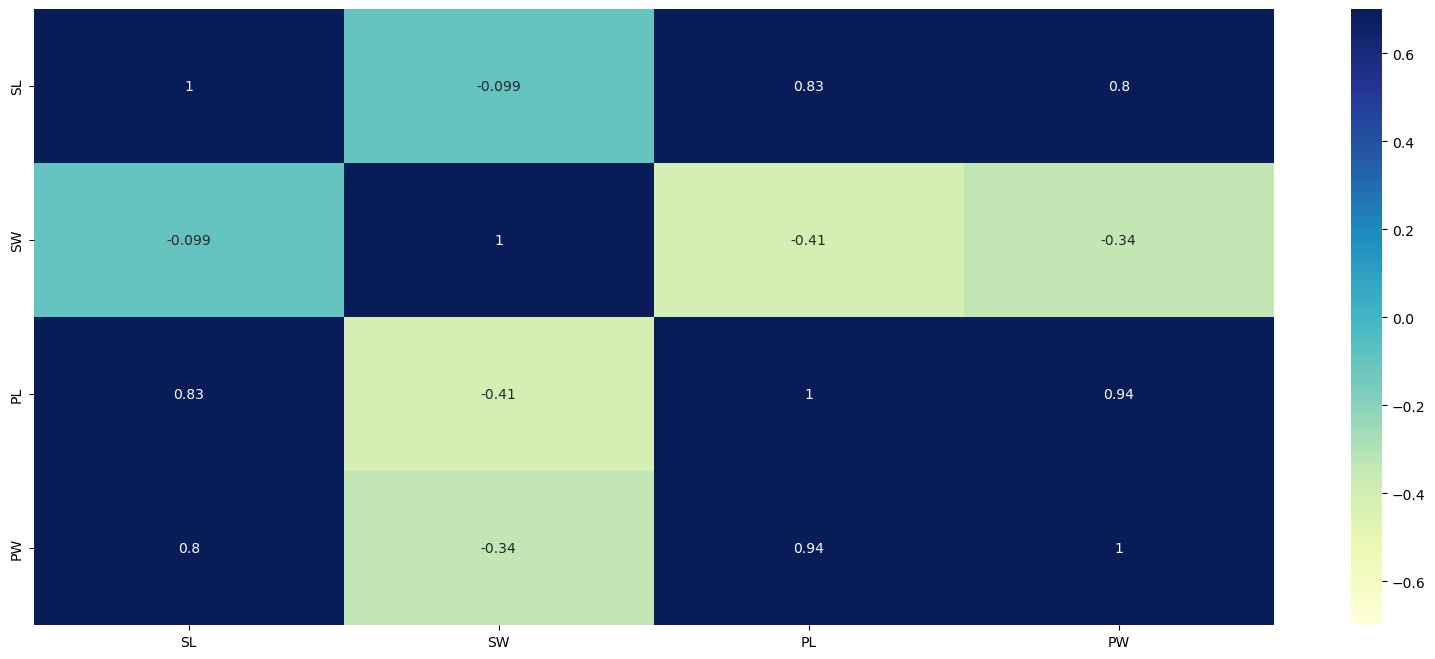

In [13]:
corrmatrix= data.corr()
plt.subplots(figsize= (20,8))
sns.heatmap(corrmatrix, annot= True, vmax=0.7, vmin=-0.7, cmap='YlGnBu')

In [14]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

# Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [16]:
data['Classification']= le.fit_transform(data['Classification'])

In [17]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


# Linear Regression

In [18]:
y= data['Classification']
x= data.drop('Classification', axis= 1)

In [19]:
x.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classification, dtype: int32

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr= LinearRegression()
model= lr.fit(x_train,y_train)
y_pred= model.predict(x_test)

In [25]:
y_pred

array([ 1.14183548, -0.01898763,  2.2845642 ,  1.33742959,  1.33143107,
        0.10552649,  1.08961535,  1.97102196,  1.47382581,  1.08110216,
        1.7422777 , -0.08488136, -0.0831443 , -0.09127674, -0.05716713,
        1.33935702,  1.99588276,  1.0328196 ,  1.18890891,  2.0121735 ,
       -0.02991908,  1.59156258,  0.10011641,  1.93392053,  1.79203395,
        2.02959674,  1.78229674,  2.05625511,  0.07162458, -0.00793393])

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
print('MSE is: ',  mean_squared_error(y_test, y_pred))
print('R Squared Value is: ', r2_score(y_test, y_pred))

MSE is:  0.03674897628057208
R Squared Value is:  0.9474179989626155


# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model1= log_reg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
y_pred= model1.predict(x_test)

In [41]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [42]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [43]:
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [45]:
print(accuracy_score(y_test, y_pred))

1.0


In [47]:
print(precision_score(y_test, y_pred, pos_label= 'positive', average= 'micro'))

1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [49]:
print(recall_score(y_test, y_pred,pos_label= 'positive', average= 'micro'))

1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# KNN model

In [50]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3, 15)

for k in neighbors:
    knn= KNeighborsClassifier(n_neighbors=k)
    model2= knn.fit(x_train, y_train)
    y_pred_knn= model2.predict(x_test)
    acc= accuracy_score(y_test, y_pred_knn)
    metric_k.append(acc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [51]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

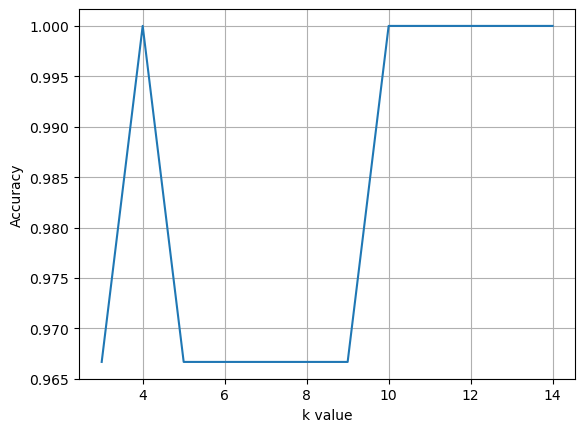

In [52]:
plt.plot(neighbors, metric_k)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [61]:
knn= KNeighborsClassifier(n_neighbors=4)
model2= knn.fit(x_train, y_train)
y_pred_knn= model2.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [62]:
print(confusion_matrix(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn, pos_label= 'positive', average= 'micro'))
print(recall_score(y_test, y_pred_knn, pos_label= 'positive', average= 'micro'))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0
1.0
1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# SVM model

In [63]:
from sklearn.svm import SVC

In [64]:
svm_clf= SVC(kernel='rbf')

In [65]:
svm_model= svm_clf.fit(x_train, y_train)

In [66]:
y_pred= svm_clf.predict(x_test)

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [68]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [69]:
accuracy_score(y_test, y_pred)

1.0

# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dt_clf= DecisionTreeClassifier(random_state=42)

In [72]:
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [75]:
y_pred= dt_clf.predict(x_test)

In [76]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [77]:
accuracy_score(y_test, y_pred)

1.0

# Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rf_clf= RandomForestClassifier(random_state=42)

In [80]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [81]:
y_pred= rf_clf.predict(x_test)

In [82]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [83]:
accuracy_score(y_test, y_pred)

1.0

In [84]:
#Accuracy valu of different classification models
#Linear Regression = 0.94
#Logistic Regression = 1.0
#KNN model = 1.0
#SVM model = 1.0
#Decision Trees = 1.0 
#Random Forest = 1.0